### Data Mining and Machine Learning
### Classification using Support Vector Machine
#### Edgar Acuna 
#### January 2022
#### Datasets: Toy example, Diabetes, Landsat, Shuttle

In [230]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

### Example 1. Linear SVM applied to the prediction of  final grade in a class bases on examens E1 and E2

In [231]:
df=pd.read_csv("http://academic.uprm.edu/eacuna/eje1dis.csv")
#df=pd.read_csv("c://PW-PR/eje1dis.csv")

In [232]:
#Normalizibg the predictor matrix
y=df['Nota']
X=df.iloc[:,0:2]
lb_make = LabelEncoder()
df["pass"] = lb_make.fit_transform(df["Nota"])
y2=df['pass']
y1=y2.to_numpy()
X1=X.to_numpy()
scaler = StandardScaler()
scaler.fit(X1)
X1= scaler.transform(X1)

#### Calculating the percentage of accuracy

In [233]:
#Applying a linear SVM classifier and calculating the percentage of accuracy
lin_clf = svm.LinearSVC()
lin_clf.fit(X1, y) 

LinearSVC()

In [234]:
#The confusion matrix
pred=lin_clf.predict(X1)
print(confusion_matrix(y,pred))

[[ 8  0]
 [ 0 24]]


In [235]:
#Calculating the number of errors
error=(y!=pred).sum()
print ("This is the number  of errors=", error)

This is the number  of errors= 0


In [236]:
print(classification_report(y,pred))

              precision    recall  f1-score   support

           f       1.00      1.00      1.00         8
           p       1.00      1.00      1.00        24

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



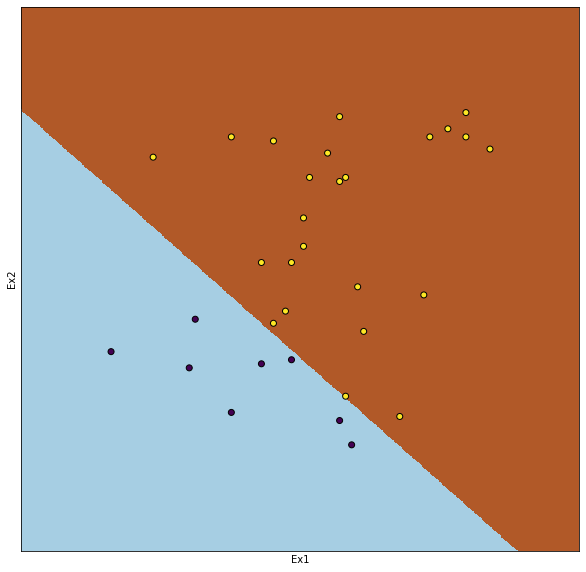

In [237]:
#Visualizing the decision Boundary
from matplotlib.colors import ListedColormap
lin_clf = svm.LinearSVC()
lin_clf.fit(X1, y1) 
eje1=np.arange(start = X1[:, 0].min()-1, stop = X1[:, 0].max() + 1, step = 0.01)
eje2=np.arange(start = X1[:, 1].min()-1, stop = X1[:, 1].max() + 1, step = 0.01)
Y1, Y2 = np.meshgrid(eje1,eje2)
pred2=lin_clf.predict(np.c_[Y1.ravel(), Y2.ravel()]).reshape(Y1.shape)
plt.figure(figsize=(10, 10))
plt.pcolormesh(Y1, Y2, pred2,cmap=plt.cm.Paired)
# Plot also the training points#
plt.scatter(X1[:, 0], X1[:, 1], c=y1, edgecolors='k')
plt.xlabel('Ex1')
plt.ylabel('Ex2')
plt.xlim(Y1.min(), Y1.max())
plt.ylim(Y2.min(), Y2.max())
plt.xticks(())
plt.yticks(())

plt.show()

### Applying a nonlinear SVM to the same dataset

In [238]:
clf = svm.SVC()
clf.fit(X1, y) 

SVC()

In [239]:
clf.support_vectors_

array([[-1.37429956, -0.56638465],
       [-2.31141707, -0.87228016],
       [-0.30330812, -0.94875403],
       [ 0.2321876 , -1.52230811],
       [-0.63799295, -0.98699097],
       [-0.97267777, -1.44583423],
       [ 0.36606153, -1.75172974],
       [ 1.63786386,  1.38369921],
       [ 1.90561172,  1.03956676],
       [ 0.2321876 ,  1.34546227],
       [-1.84285831,  0.96309288],
       [-0.63799295, -0.03106751],
       [ 0.29912456, -1.29288648],
       [ 0.90155725, -1.48407117],
       [-0.50411902, -0.60462159],
       [-0.37024509, -0.48991077],
       [ 0.49993546, -0.68109546]])

In [240]:
clf.n_support_

array([ 7, 10])

The classifiers uses 7 support vector from class "F" and 10 from class "P"

In [241]:
#Calculando las predicciones
pred=clf.predict(X1)
print(pred)
#print(confusion_matrix(y,pred))

['p' 'p' 'p' 'p' 'p' 'p' 'p' 'p' 'p' 'p' 'p' 'p' 'p' 'p' 'p' 'p' 'p' 'p'
 'p' 'p' 'p' 'p' 'p' 'p' 'f' 'f' 'p' 'f' 'f' 'f' 'f' 'f']


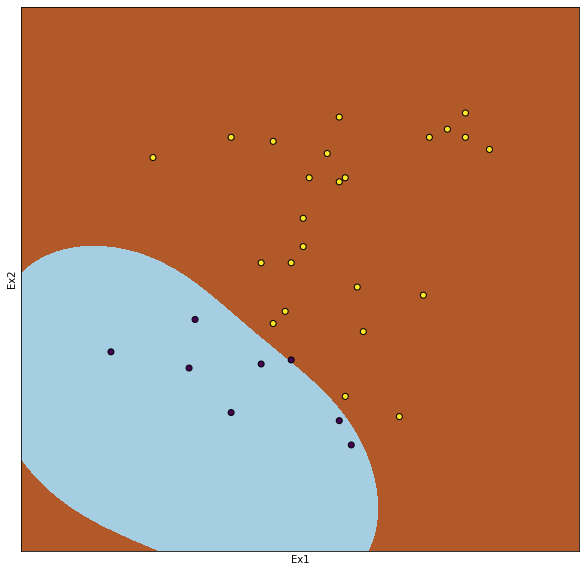

In [242]:
#Visualizing the decision Boundary
from matplotlib.colors import ListedColormap
#creando una columna "pass" numerica para representar las clases
lb_make = LabelEncoder()
df["pass"] = lb_make.fit_transform(df["Nota"])
y2=df['pass']
y1=y2.to_numpy()
X1=X.to_numpy()
scaler = StandardScaler()
scaler.fit(X1)
StandardScaler(copy=True, with_mean=True, with_std=True)
X1= scaler.transform(X1)
clf = svm.SVC()
clf.fit(X1, y1) 
eje1=np.arange(start = X1[:, 0].min()-1, stop = X1[:, 0].max() + 1, step = 0.001)
eje2=np.arange(start = X1[:, 1].min()-1, stop = X1[:, 1].max() + 1, step = 0.001)
Y1, Y2 = np.meshgrid(eje1,eje2)
pred2=clf.predict(np.c_[Y1.ravel(), Y2.ravel()]).reshape(Y1.shape)
plt.figure(figsize=(10, 10))
plt.pcolormesh(Y1, Y2, pred2,cmap=plt.cm.Paired)
# Plot also the training points#
plt.scatter(X1[:, 0], X1[:, 1], c=y1, edgecolors='k')
plt.xlabel('Ex1')
plt.ylabel('Ex2')
plt.xlim(Y1.min(), Y1.max())
plt.ylim(Y2.min(), Y2.max())
plt.xticks(())
plt.yticks(())

plt.show()

### Ejemplo 2. Linear SVM applied to Diabetes

In [243]:
url= "http://academic.uprm.edu/eacuna/diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_table(url, names=names)
print(data.shape)
data.head()

(768, 9)


,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,2
1,1,85,66,29,0,26.6,0.351,31,1
2,8,183,64,0,0,23.3,0.672,32,2
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,2


In [244]:
y=data['class']
X=data.iloc[:,0:8]
#y1=y.to_numpy()
#X1=X.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y)
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [245]:
#Accuracy estimation using the "holdout" method
lin_clf = svm.LinearSVC()
lin_clf.fit(X_train, y_train) 

LinearSVC()

In [246]:
pred=lin_clf.predict(X_test)
print ('The accuracy estimated by CV is:', (pred==y_test).mean())
print('The confusion matrix is:')
print(confusion_matrix(y_test, pred))

The accuracy estimated by CV is: 0.7552083333333334
The confusion matrix is:
[[107  15]
 [ 32  38]]


### Nonlinear  SVM applied to Diabetes

In [247]:
clf=svm.SVC()
clf.fit(X_train, y_train) 
print("The accuracy is=",clf.score(X_test,y_test))
predictions = clf.predict(X_test)

The accuracy is= 0.71875


### support vectors

In [248]:
clf.support_vectors_

array([[-0.86063419,  0.10683012, -0.43095034, ...,  0.52973873,
         0.084322  , -1.03587088],
       [ 2.69083061,  1.02242289,  0.96610837, ...,  1.12272697,
         2.00452396,  0.52948538],
       [ 1.80296441,  0.26469094,  0.36736892, ...,  0.54209266,
        -0.59647688,  0.52948538],
       ...,
       [-0.26872339,  1.65386618,  0.66673865, ...,  0.8509407 ,
         4.80627318, -0.68801394],
       [ 0.32318741,  1.30657237,  1.76442763, ...,  0.76446325,
        -0.97178908,  1.66002046],
       [ 2.09891981,  0.48569609,  0.76652855, ..., -0.39680539,
        -0.65466481,  0.79037809]])

In [249]:
clf.n_support_

array([168, 160])

#### Accuracy using cross validation

In [250]:
#Accuracy using cross validation
y1=y.to_numpy()
X1=X.to_numpy()
scaler = StandardScaler()
scaler.fit(X1)
#StandardScaler(copy=True, with_mean=True, with_std=True)
X1= scaler.transform(X1)
clf=svm.SVC()
clf.fit(X1, y1) 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X1, y1, cv=10)
print ('The accuracy estimated by CV is:', scores.mean())    

The accuracy estimated by CV is: 0.7603896103896104


In [251]:
#accuracy using train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y)
scaler = StandardScaler()
scaler.fit(X_train)
#StandardScaler(copy=True, with_mean=True, with_std=True)
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)
clf=svm.SVC()
clf.fit(X_train, y_train) 
pred=clf.predict(X_test)

In [252]:
print (classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.76      0.88      0.82       128
           2       0.65      0.44      0.52        64

    accuracy                           0.73       192
   macro avg       0.70      0.66      0.67       192
weighted avg       0.72      0.73      0.72       192



### Example 3. Linear SVM applied to Landsat 

In [253]:
#Loading the Landsat dataset
url='http://academic.uprm.edu/eacuna/landsat.txt'
data = pd.read_table(url, header=None,delim_whitespace=True)
y=data.iloc[:,36]
X=data.iloc[:,0:36]
#y1=y.as_matrix()
#X1=X.as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X, y)
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [254]:
#Accuracy estimation using the "holdout" method
lin_clf = svm.LinearSVC()
lin_clf.fit(X_train, y_train) 

LinearSVC()

In [255]:
pred=lin_clf.predict(X_test)
print ('The accuracy estimated by CV is:', (pred==y_test).mean())
print('The confusion matrix is:')
print(confusion_matrix(y_test, pred))

The accuracy estimated by CV is: 0.8403967538322813
The confusion matrix is:
[[247   1   3   0   0   0]
 [  0 122   0   2   2   0]
 [  0   0 239   3   0   6]
 [  2   1  36  10   1  61]
 [  8   3   0   2  69  23]
 [  0   1  11   6   5 245]]


In [256]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.96      0.98      0.97       251
           2       0.95      0.97      0.96       126
           3       0.83      0.96      0.89       248
           4       0.43      0.09      0.15       111
           5       0.90      0.66      0.76       105
           6       0.73      0.91      0.81       268

    accuracy                           0.84      1109
   macro avg       0.80      0.76      0.76      1109
weighted avg       0.82      0.84      0.81      1109



### Non-linear SVM

In [257]:
clf=svm.SVC()
clf.fit(X_train, y_train) 
print("The accuracy is=",clf.score(X_test,y_test))
predictions = clf.predict(X_test)

The accuracy is= 0.8818755635707844


### Example 4. Linear SVM applied to Shuttle

In [258]:
url = "https://academic.uprm.edu/eacuna/shuttle.trn"
data = pd.read_table(url, header=None,delim_whitespace=True)

In [259]:
y=data.iloc[:,9]
X=data.iloc[:,0:9]


In [260]:
#Accuracy estimacion using the  "holdout" method 
X_train, X_test, y_train, y_test = train_test_split(X, y)
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)
lin_clf = svm.LinearSVC()
lin_clf.fit(X_train, y_train) 

LinearSVC()

In [261]:
pred=lin_clf.predict(X_test)
print(confusion_matrix(y_test, pred))

[[8434    0    0   73    0    0    0]
 [   4    0    0    6    0    0    0]
 [  15    0    0   14    1    0    0]
 [ 724    0    0  973    0    0    0]
 [   0    0    0    2  626    0    0]
 [   0    0    0    1    0    0    0]
 [   1    0    0    0    0    0    1]]


In [262]:
print("The accuracy is=",lin_clf.score(X_test,y_test))

The accuracy is= 0.9226666666666666


In [263]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.92      0.99      0.95      8507
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        30
           4       0.91      0.57      0.70      1697
           5       1.00      1.00      1.00       628
           6       0.00      0.00      0.00         1
           7       1.00      0.50      0.67         2

    accuracy                           0.92     10875
   macro avg       0.55      0.44      0.47     10875
weighted avg       0.92      0.92      0.91     10875



### Non-linear SVM

In [264]:
clf1 = svm.SVC()
clf1.fit(X_train, y_train) 

SVC()

In [265]:
pred=clf1.predict(X_test)
print(confusion_matrix(y_test, pred))

[[8507    0    0    0    0    0    0]
 [   3    5    0    1    1    0    0]
 [  10    0   19    0    1    0    0]
 [   1    0    0 1696    0    0    0]
 [   6    0    0    0  622    0    0]
 [   1    0    0    0    0    0    0]
 [   2    0    0    0    0    0    0]]


In [266]:
print("The accuracy is=",clf1.score(X_test,y_test))

The accuracy is= 0.9976091954022989


In [267]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      8507
           2       1.00      0.50      0.67        10
           3       1.00      0.63      0.78        30
           4       1.00      1.00      1.00      1697
           5       1.00      0.99      0.99       628
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2

    accuracy                           1.00     10875
   macro avg       0.71      0.59      0.63     10875
weighted avg       1.00      1.00      1.00     10875

